<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_09_onehot_word_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Vectorization Techniques: Token, One-Hot Encoding, and Token Embedding

## Introduction

텍스트 데이터를 벡터화(vectorizing)하는 것은 자연어 처리를 위해 텍스트 데이터를 수치 데이터로 변환하는 중요한 과정입니다. 이를 통해 머신러닝 모델이 텍스트 데이터를 이해하고 처리할 수 있습니다. 여기서는 **토큰(token)**, **원-핫 인코딩(one-hot encoding)**, 그리고 **토큰 임베딩(token embedding)**에 대해 알아보겠습니다.

### Token의 개념
- **토큰(token)**: 텍스트 데이터에서 의미있는 단위로 나누어진 단어, 문장, 문자 등을 지칭합니다.
  - 예를 들어, 문장 `"I love AI"`는 3개의 토큰인 `"I"`, `"love"`, `"AI"`로 나눌 수 있습니다.
  - 이러한 토큰은 기계가 이해할 수 있는 벡터 형태로 변환되어야 합니다.

## **1. One-Hot Encoding**
- **원-핫 인코딩**은 텍스트 데이터를 벡터로 변환하는 가장 기본적인 방법입니다.
  - 단어 집합(전체 말뭉치)에서 각 단어에 고유한 인덱스를 부여하고, 해당 단어의 위치만 `1`로, 나머지는 `0`으로 표시합니다.
  - 단점:
    - 단어 간의 의미를 표현하지 못하고, 고차원 희소 벡터가 생성됩니다.

<img src = 'https://s-ai-f.github.io/Natural-Language-Processing/images/one-hot.png'>

### 예제 코드 (Python)
아래는 단어들을 원-핫 인코딩으로 표현하는 예제입니다.

In [1]:
# One-Hot Encoding Example
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 단어 리스트 예시
corpus = ["I", "love", "AI", "and", "machine", "learning"]

# 단어들을 고유 인덱스로 매핑
unique_words = list(set(corpus))
word_to_index = {word: idx for idx, word in enumerate(unique_words)}

# 각 단어를 원-핫 벡터로 변환
# 'sparse' argument has been replaced with 'sparse_output'
one_hot_encoder = OneHotEncoder(categories='auto', sparse_output=False)
encoded = one_hot_encoder.fit_transform(np.array(unique_words).reshape(-1, 1))

# 결과 출력
for word, vector in zip(unique_words, encoded):
    print(f"Word: {word}, One-Hot Vector: {vector}")

Word: learning, One-Hot Vector: [0. 0. 0. 1. 0. 0.]
Word: AI, One-Hot Vector: [1. 0. 0. 0. 0. 0.]
Word: I, One-Hot Vector: [0. 1. 0. 0. 0. 0.]
Word: machine, One-Hot Vector: [0. 0. 0. 0. 0. 1.]
Word: love, One-Hot Vector: [0. 0. 0. 0. 1. 0.]
Word: and, One-Hot Vector: [0. 0. 1. 0. 0. 0.]


## 2. Word Embedding

<img src ='https://quantdare.com/wp-content/uploads/2020/03/text_vector.png'>

### 고정된 길이의 실수 벡터로 변환되며, 이러한 벡터들은 단어 간의 관계를 나타내며 의미적 정보를 포함합니다.
  - 장점:
    - 단어의 의미적 관계를 잘 표현하고, 벡터 차원이 원-핫 인코딩보다 낮아 효율적입니다.

### 예제 코드 (Python)
아래는 `gensim` 라이브러리를 사용하여 Word2Vec으로 단어 임베딩을 학습시키고 사용하는 예제입니다.


In [2]:
# Word Embedding Example using Word2Vec
from gensim.models import Word2Vec

# 간단한 말뭉치 예제
sentences = [["I", "love", "AI"],
             ["AI", "is", "the", "future"],
             ["machine", "learning", "is", "fun"],
             ["I", "love", "machine", "learning"]]

# Word2Vec 모델 학습
model = Word2Vec(sentences,
                 vector_size=5,
                 window=3,
                 min_count=1,
                 workers=4)

# 특정 단어의 벡터 확인
word_vector = model.wv['AI']
print("Word Embedding for 'AI':", word_vector)

# 두 단어의 유사도 계산
similarity = model.wv.similarity('AI', 'machine')
print("Similarity between 'AI' and 'machine':", similarity)

Word Embedding for 'AI': [-0.03632035  0.0575316   0.01983747 -0.1657043  -0.18897636]
Similarity between 'AI' and 'machine': 0.61786264



- `Word2Vec`을 사용해 각 단어를 의미를 내포한 벡터로 변환합니다. 위 예시에서는 `"AI"`와 `"machine"` 간의 유사도를 계산할 수 있습니다.
- 이러한 임베딩 벡터들은 원-핫 인코딩보다 훨씬 효율적이고 의미적인 계산이 가능하며, NLP 모델에서 중요한 역할을 합니다.

## 결론
이 두 가지 방식이 텍스트 데이터를 벡터화하여 기계 학습 모델에 사용할 수 있는 형태로 바꾸는 기본적인 방법들입니다. 원-핫 인코딩은 단순하고 빠르지만 차원이 높고 의미적 유사도를 표현하지 못하는 반면, 토큰 임베딩은 의미적 유사도를 내재화하여 효율적인 분석이 가능합니다.


<img src= 'https://cdn.prod.website-files.com/6064b31ff49a2d31e0493af1/66cef3985f923ec769df8eb5_AD_4nXe19mFpOv6IyXTZ-oAlO-P3Y_PwAzQjx664efQUB6MI9ncrgAxXgoVYf_JvODN7ULzKOZNT9xB0leCEVOo4QbM346bnzy2cpY3kflfciiKT4LHn8Olz13aSC8u_VhLfPn2ZMrUtgZEpMZfipHrvLDFedJgk.png'>

## <font color ='orange'> **1. Onehot Word Embedding**

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# 샘플 문장 데이터
sentences = [
    'I love machine learning',
    'Deep learning is amazing',
    'Natural language processing is a field of AI'
]

# 토크나이저를 사용해 단어를 인덱스로 변환
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
word_index

{'learning': 1,
 'is': 2,
 'i': 3,
 'love': 4,
 'machine': 5,
 'deep': 6,
 'amazing': 7,
 'natural': 8,
 'language': 9,
 'processing': 10,
 'a': 11,
 'field': 12,
 'of': 13,
 'ai': 14}

In [4]:
# 시퀀스로 변환
sequences = tokenizer.texts_to_sequences(sentences)
sequences

[[3, 4, 5, 1], [6, 1, 2, 7], [8, 9, 10, 2, 11, 12, 13, 14]]

In [5]:

# 패딩 추가 (모든 시퀀스를 동일한 길이로 맞춤)
# 함수에서 기본 길이 (maxlen)는 지정되지 않을 경우, 입력된 시퀀스 중 가장 긴 시퀀스의 길이(8개)가 기본 길이로 사용
# 즉, 자동으로 입력된 시퀀스들 중 가장 긴 시퀀스를 기준으로 모든 시퀀스를 패딩해서 동일한 길이로 맞춘다.
padded_sequences = pad_sequences(sequences, padding='post')
padded_sequences

array([[ 3,  4,  5,  1,  0,  0,  0,  0],
       [ 6,  1,  2,  7,  0,  0,  0,  0],
       [ 8,  9, 10,  2, 11, 12, 13, 14]], dtype=int32)

In [6]:
# OneHot Encoding
vocab_size = len(word_index) + 1
onehot_encoded = np.zeros((len(padded_sequences),
                           padded_sequences.shape[1],
                           vocab_size))
for i, seq in enumerate(padded_sequences):
    for j, word_id in enumerate(seq):
        if word_id != 0:
            onehot_encoded[i, j, word_id] = 1

print("OneHot Encoded Representation:")
print(onehot_encoded.shape)
print(onehot_encoded)


OneHot Encoded Representation:
(3, 8, 15)
[[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.

### 패딩된 시퀀스가 길이 8이 된 이유는 입력된 문장 중 가장 긴 문장의 길이가 8이기 때문이고 pad_sequences 함수에서 maxlen을 명시하지 않았기 때문에, 기본적으로 가장 긴 시퀀스의 길이에 맞춰 모든 시퀀스를 패딩
#### 아래 이미지를 보면 (8, 14), 패딩크기 8개, 14개 고유단어 개수

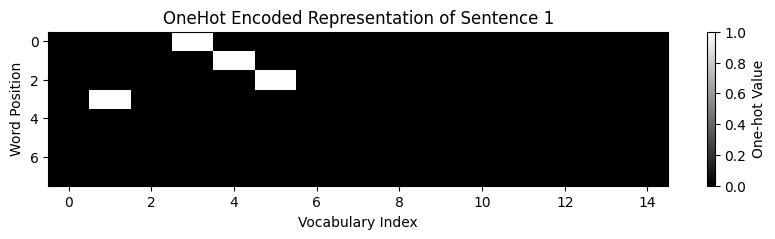

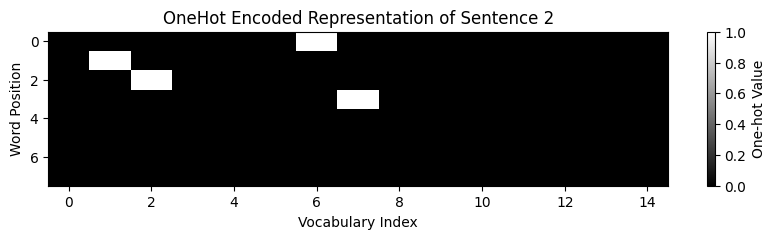

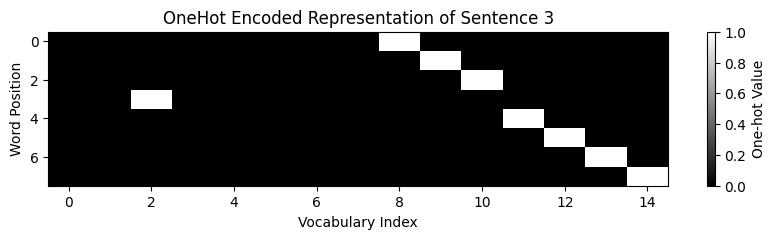

In [7]:
# prompt: onehot_encoded를 행에 3장 모두 이미지로 표시

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'onehot_encoded' is defined from the previous code
# and is a 3D numpy array

# Check if onehot_encoded is defined
if 'onehot_encoded' not in locals():
    print("Error: 'onehot_encoded' variable not found. Please run the code that generates this variable first.")
else:
  # Visualize the onehot encoded representation as images
  for i in range(min(len(onehot_encoded), 3)):  # Limit to 3 images
      plt.figure(figsize=(10, 2))  # Adjust figure size for better visibility
      plt.imshow(onehot_encoded[i], cmap='gray', aspect='auto') # Use 'auto' aspect ratio for accurate representation
      plt.title(f"OneHot Encoded Representation of Sentence {i+1}")
      plt.xlabel("Vocabulary Index")
      plt.ylabel("Word Position")
      plt.colorbar(label='One-hot Value') # add colorbar for clarity
      plt.show()

## <font color ='orange'> **2. Word2vec Embedding**
### **2.1. 원자료로 학습**

In [15]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense
from tensorflow.keras.models import Model

# 임베딩 레이어를 사용해 Word Embedding 적용
vocab_size = len(word_index) + 1
embedding_dim = 12   # 12차원으로 표시

# 모델 정의
input_layer = Input(shape=(padded_sequences.shape[1],),
                    name='input_layer')
embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            name='embedding_layer')(input_layer)
flatten_layer = Flatten()(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(flatten_layer)
model = Model(inputs=input_layer, outputs=output_layer)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 학습 (샘플 레이블 사용)
labels = np.array([1, 0, 1])  # 임의의 레이블 정의
model.fit(padded_sequences, labels, epochs=10, verbose=1)

# 임베딩 레이어만을 통과한 결과 확인
embedding_layer_model = Model(inputs=model.input, outputs=model.get_layer('embedding_layer').output)
embedding_output = embedding_layer_model.predict(padded_sequences)
print("\nWord Embedding Representation (Embedding Layer Only):")
print(embedding_output)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6667 - loss: 0.6954
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.6667 - loss: 0.6909
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6667 - loss: 0.6864
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.6820
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.6776
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.6732
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.6689
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.6645
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.6602
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.6559
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Word Embedding Representation (Embedding Layer Only):
[[[-0.00411828 -0.01710278 -0.02222063  0.0084779   0.03409361
    0.00580649

### embedding_output[0].shape이 (8, 12)인 이유는 입력된 문장이 8개의 토큰으로 패딩되었고, 각 토큰이 12차원의 임베딩 벡터로 표현되었기 때문이며 최종적으로 (시퀀스 길이, 임베딩 차원) 형태의 결과인 (8, 12)이 출력

In [16]:
embedding_output[0].shape

(8, 12)

In [ ]:
embedding_output[0]

array([[-0.05630193,  0.02964749, -0.02425123,  0.03573531,  0.02369232,
         0.00812091,  0.01632954, -0.04311074,  0.02155553,  0.03470282,
         0.00875277, -0.01808386],
       [-0.04741874,  0.01260555, -0.00907064, -0.00893912,  0.01248397,
        -0.01491644,  0.00228596, -0.04434543,  0.04361824, -0.02777231,
         0.02411043, -0.04507975],
       [ 0.04537173, -0.03330579, -0.0037768 , -0.00130356,  0.04824394,
        -0.0284008 , -0.01695702,  0.01841414, -0.03026556,  0.02605768,
        -0.03074069,  0.0335498 ],
       [-0.02055052,  0.01960771,  0.00621283,  0.01591437,  0.0263096 ,
        -0.0002372 ,  0.0538251 ,  0.01556544,  0.00642496,  0.05686895,
         0.02251787,  0.00382334],
       [-0.02248487, -0.01334157,  0.03935318,  0.03280211, -0.021336  ,
        -0.04244348,  0.04055266, -0.04480906, -0.01130843,  0.03792709,
         0.00769201,  0.04598083],
       [-0.02248487, -0.01334157,  0.03935318,  0.03280211, -0.021336  ,
        -0.04244348,  

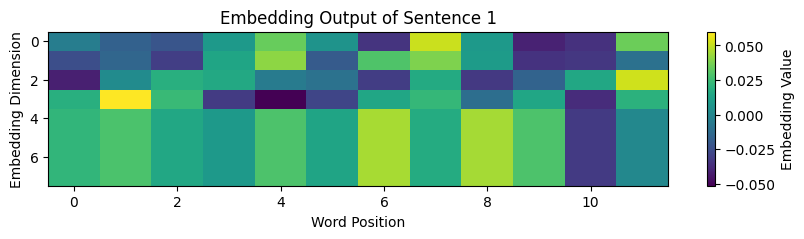

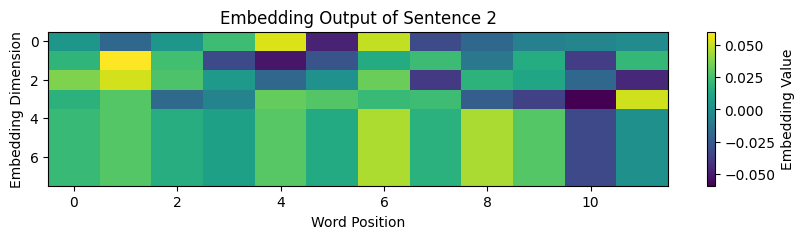

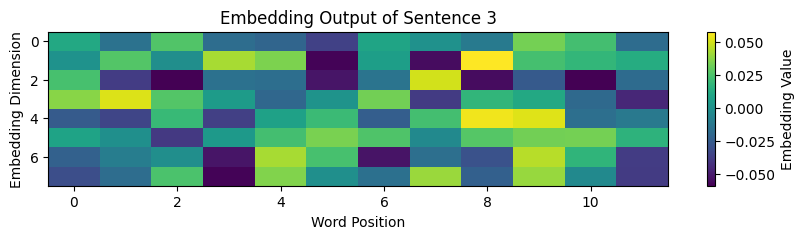

In [17]:
# prompt: embedding_output을  3장 모두 시각화

import matplotlib.pyplot as plt

# Check if embedding_output is defined
if 'embedding_output' not in locals():
    print("Error: 'embedding_output' variable not found. Please run the code that generates this variable first.")
else:
  # Visualize the embedding output as images
  for i in range(min(len(embedding_output), 3)):  # Limit to 3 images
      plt.figure(figsize=(10, 2))  # Adjust figure size for better visibility
      plt.imshow(embedding_output[i], cmap='viridis', aspect='auto') # Use 'auto' aspect ratio for accurate representation
      plt.title(f"Embedding Output of Sentence {i+1}")
      plt.xlabel("Word Position")
      plt.ylabel("Embedding Dimension")
      plt.colorbar(label='Embedding Value') # add colorbar for clarity
      plt.show()

### **2.2. pretrained Word2vec (gensim) 학습**

In [25]:
sentences

['I love machine learning',
 'Deep learning is amazing',
 'Natural language processing is a field of AI']

In [26]:
sentences[0].split(' ')

['I', 'love', 'machine', 'learning']

In [27]:
sentences = [text.split(' ') for text in sentences]

In [29]:
sentences

[['I', 'love', 'machine', 'learning'],
 ['Deep', 'learning', 'is', 'amazing'],
 ['Natural', 'language', 'processing', 'is', 'a', 'field', 'of', 'AI']]

In [28]:
# prompt: gensim word2vec를 적용

# Pre-trained Word2Vec model

# Gensim Word2Vec 적용 (기존 코드 활용)
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# 단어 벡터 확인
print(model.wv['AI'])

# 단어 유사도 확인
print(model.wv.similarity('AI', 'machine'))

# 단어 벡터를 사용하여 추가적인 분석이나 모델링 수행
# 예를 들어, 단어 벡터를 평균내어 문장 벡터 생성 등

[ 9.4573152e-05  3.0776190e-03 -6.8133073e-03 -1.3755992e-03
  7.6693264e-03  7.3471237e-03 -3.6736543e-03  2.6429587e-03
 -8.3179381e-03  6.2060896e-03 -4.6377731e-03 -3.1644141e-03
  9.3122618e-03  8.7347062e-04  7.4914312e-03 -6.0746530e-03
  5.1610083e-03  9.9237878e-03 -8.4582139e-03 -5.1361904e-03
 -7.0655239e-03 -4.8631243e-03 -3.7789312e-03 -8.5370289e-03
  7.9563791e-03 -4.8444089e-03  8.4244320e-03  5.2630822e-03
 -6.5506627e-03  3.9582560e-03  5.4706815e-03 -7.4272580e-03
 -7.4064396e-03 -2.4754715e-03 -8.6265635e-03 -1.5817261e-03
 -4.0347208e-04  3.3000053e-03  1.4420206e-03 -8.8150724e-04
 -5.5946019e-03  1.7305340e-03 -8.9745905e-04  6.7943512e-03
  3.9739767e-03  4.5299120e-03  1.4344454e-03 -2.7001179e-03
 -4.3672374e-03 -1.0321750e-03  1.4371672e-03 -2.6462660e-03
 -7.0744706e-03 -7.8060660e-03 -9.1226734e-03 -5.9357462e-03
 -1.8476042e-03 -4.3242918e-03 -6.4612986e-03 -3.7176837e-03
  4.2895754e-03 -3.7394068e-03  8.3789900e-03  1.5341426e-03
 -7.2430237e-03  9.43471